### 2a) Load the data and report general information from the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 3600 entries, 0 to 3599
dtypes: float64(3600)
memory usage: 56.4 KB
None
           0         1          2         3          4         5         6     \
count  2.000000  2.000000   2.000000  2.000000   2.000000  2.000000  2.000000   
mean   4.951814  5.473387   7.729196  5.332286   7.706135  5.471006  3.595043   
std    5.588709  6.326325   9.516520  6.126778   9.483907  6.322957  5.084159   
min    1.000000  1.000000   1.000000  1.000000   1.000000  1.000000  0.000000   
25%    2.975907  3.236694   4.364598  3.166143   4.353067  3.235503  1.797522   
50%    4.951814  5.473387   7.729196  5.332286   7.706135  5.471006  3.595043   
75%    6.927721  7.710081  11.093794  7.498429  11.059202  7.706509  5.392565   
max    8.903629  9.946774  14.458392  9.664572  14.412270  9.942011  7.190087   

           7         8          9     ...      3590      3591      3592  \
count  2.000000  2.000000   2.000000  ...  2.

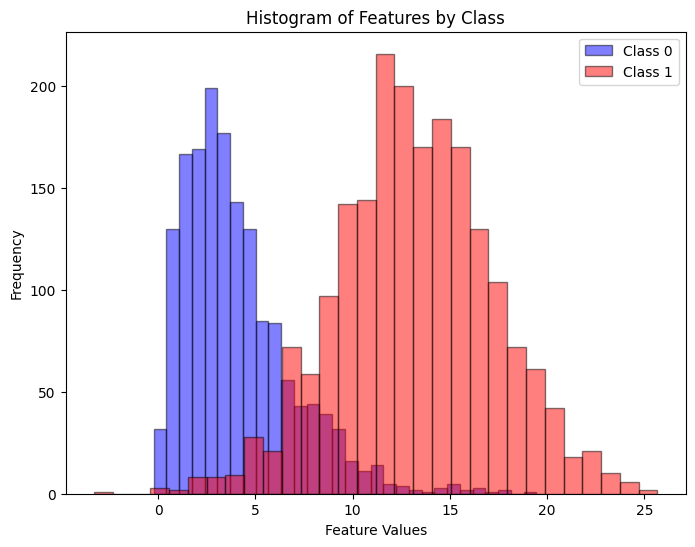

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('data_problem2.csv', header=None, delimiter=',')

print(data.info())
print(data.describe())
print(data.head())

# Splitting the data into features and labels
features = data.iloc[0, :]  
labels = data.iloc[1, :] 

class_0_features = features[labels == 0].values.flatten()  # Features for class 0
class_1_features = features[labels == 1].values.flatten()  # Features for class 1

# Plot the histogram
plt.figure(figsize=(8, 6))
# blue color for Class 0
plt.hist(class_0_features, bins=30, alpha=0.5, label='Class 0', color='blue', edgecolor='black')
# red color for Class 0
plt.hist(class_1_features, bins=30, alpha=0.5, label='Class 1', color='red', edgecolor='black')

plt.title('Histogram of Features by Class')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2a) + Histogram 
 

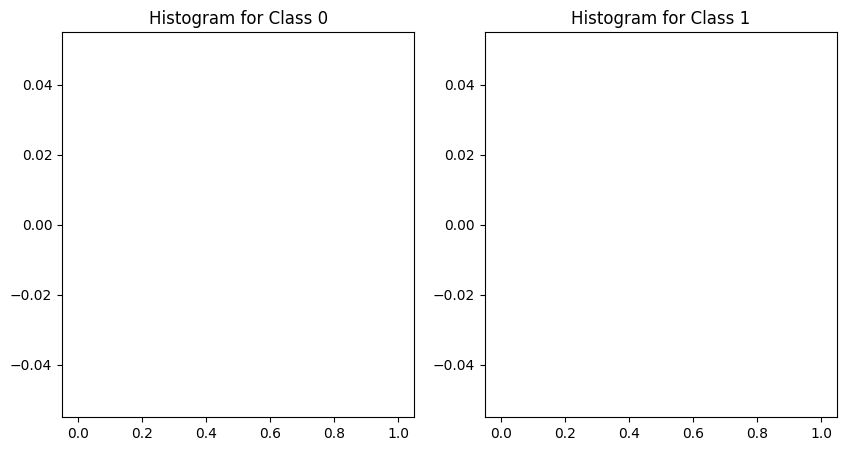